In [1]:
from __future__ import print_function
import pylab as pl
import numpy as np
import json

s = json.load(open("fbb_matplotlibrc.json"))
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/clayton/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([  3.,  11.,   9.,  20.,  11.,  25.,   9.,   5.,   5.,   2.]),
 array([  66.17336347,   73.53440783,   80.89545218,   88.25649653,
          95.61754088,  102.97858524,  110.33962959,  117.70067394,
         125.0617183 ,  132.42276265,  139.783807  ]),
 <a list of 10 Patch objects>)

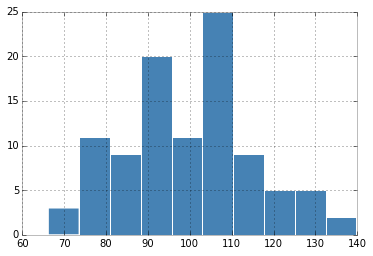

In [2]:
mymean = 100.0

mydist = np.random.chisquare(mymean, 100)
pl.hist(mydist)

In [3]:
# sizes = range(10,2000,100)
sizes=1990/(np.array(np.linspace(1,1990,100)+10))

In [4]:
# distributions Normal, a Poisson, a Binomial, a Chi-Squared, Guassian, Rayleigh
distributions = {}
distributions['chisquare'] = {}
distributions['binomial'] = {}
distributions['lognormal'] = {}
distributions['gaussian'] = {}
distributions['poisson'] = {}
distributions['rayleigh'] = {}

In [5]:
# generate n distributions for each type
for n in sizes:
    distributions['chisquare'][n] = np.random.chisquare(mymean, n)
    distributions['binomial'][n] = numpy.random.binomial(mymean*2, 0.5, size=n)
    distributions['lognormal'][n] = numpy.random.lognormal(log(mymean), sigma=1.0, size=n)
    distributions['gaussian'][n] = numpy.random.normal(mymean, scale=1.0, size=n) # gaussian
    distributions['poisson'][n] = numpy.random.poisson(mymean, size=n)
    distributions['rayleigh'][n] = numpy.random.rayleigh(np.sqrt(2 / np.pi) * mymean, size=n)

/home/clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/clayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/clayton/anaconda/lib/python2.7/site-packages/ipyker

/home/clayton/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/clayton/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


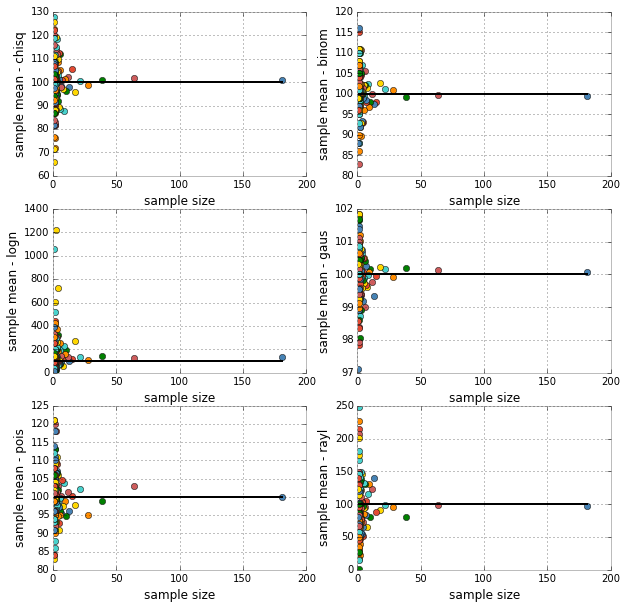

In [6]:
# figure
fig_mu_N = pl.figure(figsize=(10,10))
# subplot for each distribution
axchisq_mu_n = fig_mu_N.add_subplot(321)
binom_plot = fig_mu_N.add_subplot(322)
logn_plot = fig_mu_N.add_subplot(323)
gaus_plot = fig_mu_N.add_subplot(324)
pois_plot = fig_mu_N.add_subplot(325)
rayl_plot = fig_mu_N.add_subplot(326)

for n in sizes:
    axchisq_mu_n.plot(n, distributions['chisquare'][n].mean(), 'o')
    axchisq_mu_n.set_xlabel("sample size")
    axchisq_mu_n.set_ylabel("sample mean - chisq")
    axchisq_mu_n.plot([min(sizes), max(sizes)], [mymean, mymean], 'k')
    binom_plot.plot(n, distributions['binomial'][n].mean(), 'o')
    binom_plot.set_xlabel("sample size")
    binom_plot.set_ylabel("sample mean - binom")
    binom_plot.plot([min(sizes), max(sizes)], [mymean, mymean], 'k')
    logn_plot.plot(n, distributions['lognormal'][n].mean(), 'o')
    logn_plot.set_xlabel("sample size")
    logn_plot.set_ylabel("sample mean - logn")
    logn_plot.plot([min(sizes), max(sizes)], [mymean, mymean], 'k')
    gaus_plot.plot(n, distributions['gaussian'][n].mean(), 'o')
    gaus_plot.set_xlabel("sample size")
    gaus_plot.set_ylabel("sample mean - gaus")
    gaus_plot.plot([min(sizes), max(sizes)], [mymean, mymean], 'k')
    pois_plot.plot(n, distributions['poisson'][n].mean(), 'o')
    pois_plot.set_xlabel("sample size")
    pois_plot.set_ylabel("sample mean - pois")
    pois_plot.plot([min(sizes), max(sizes)], [mymean, mymean], 'k')
    rayl_plot.plot(n, distributions['rayleigh'][n].mean(), 'o')
    rayl_plot.set_xlabel("sample size")
    rayl_plot.set_ylabel("sample mean - rayl")
    rayl_plot.plot([min(sizes), max(sizes)], [mymean, mymean], 'k')


In [7]:
# collect distribution means for histograms
hists = {}
hists['chisquare'] = [0]*100
hists['binomial'] = [0]*100
hists['lognormal'] = [0]*100
hists['gaussian'] = [0]*100
hists['poisson'] = [0]*100
hists['rayleigh'] = [0]*100
for i,n in enumerate(sizes[sizes>1]):
    hists['chisquare'][i] = distributions['chisquare'][n].mean()
    hists['binomial'][i] = distributions['binomial'][n].mean()
    hists['lognormal'][i] = distributions['lognormal'][n].mean()
    hists['gaussian'][i] = distributions['gaussian'][n].mean()
    hists['poisson'][i] = distributions['poisson'][n].mean()
    hists['rayleigh'][i] = distributions['rayleigh'][n].mean()

(array([  5.,   9.,  19.,  25.,  17.,  15.,   3.,   2.,   3.,   2.]),
 array([   0.        ,   24.72878781,   49.45757563,   74.18636344,
          98.91515126,  123.64393907,  148.37272688,  173.1015147 ,
         197.83030251,  222.55909033,  247.28787814]),
 <a list of 10 Patch objects>)

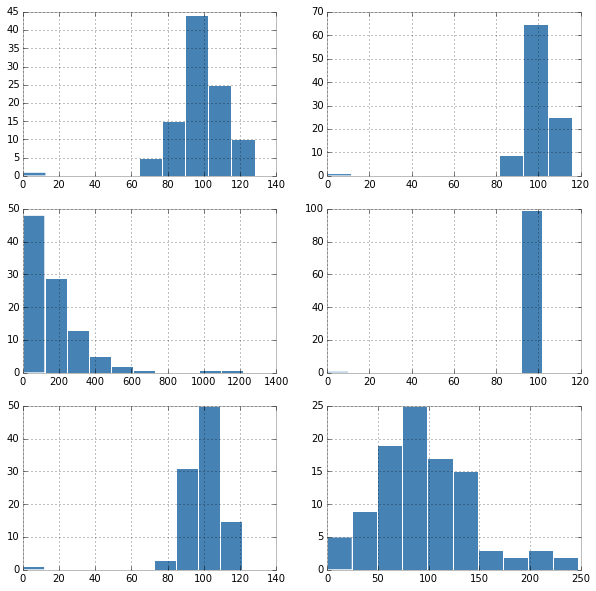

In [8]:
# figure
fig_mu_N = pl.figure(figsize=(10,10))
# subplot for each distribution
axchisq_mu_n = fig_mu_N.add_subplot(321)
binom_plot = fig_mu_N.add_subplot(322)
logn_plot = fig_mu_N.add_subplot(323)
gaus_plot = fig_mu_N.add_subplot(324)
pois_plot = fig_mu_N.add_subplot(325)
rayl_plot = fig_mu_N.add_subplot(326)

axchisq_mu_n.hist(hists['chisquare'])
binom_plot.hist(hists['binomial'])
logn_plot.hist(hists['lognormal'])
gaus_plot.hist(hists['gaussian'])
pois_plot.hist(hists['poisson'])
rayl_plot.hist(hists['rayleigh'])

##### response assignment 1
all the scatter plots make sense, smaller sample size tend to have more variance and as the sample increases the converge upon the mean. The gaussian distribution histogram seems strange, but that is due to the fact that all sample means are within +/- 3 of 100